Number of Images :  35
Image dimensions : (720, 1280, 3)


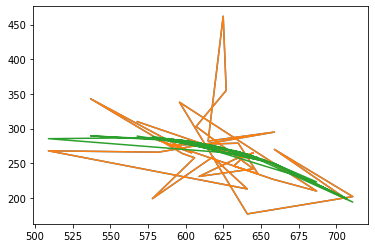

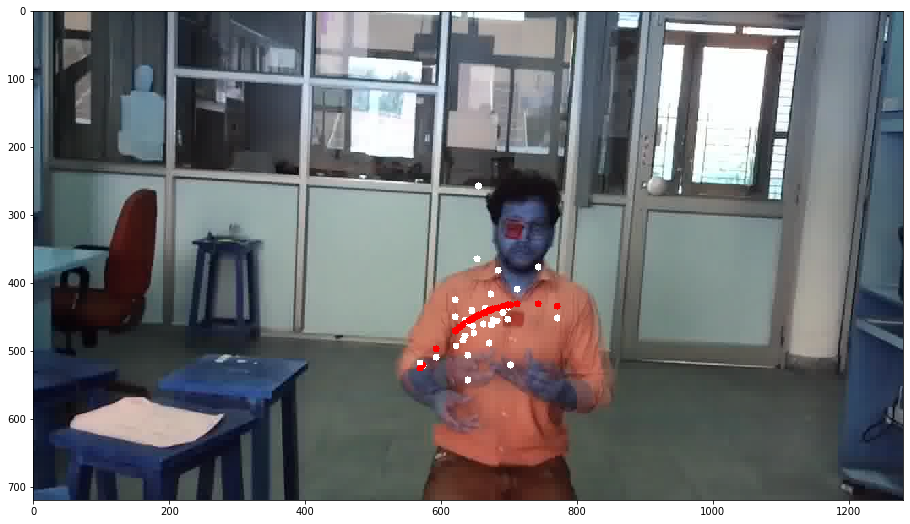

In [66]:
import cv2
import os
from pathlib import Path

ImageDir = 'Dataset_3'
files = []
for f in sorted(os.listdir(ImageDir), key=lambda x: int(os.path.splitext(x)[0])):
  files.append(ImageDir + "/" + f)
images = [cv2.imread(file) for file in files]

print("Number of Images : " , len(images))
print(f"Image dimensions : {images[0].shape}")

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


# # Blue DS-3
blueLower =(119,50,148)
blue\Upper =(133,255,255)

df = pd.DataFrame()



for i in images:
    img = i.copy()
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv, blueLower, blue\Upper)

    ## slice the green
    imask = mask>0
    green = np.zeros_like(img, np.uint8)
    green[imask] = img[imask]
    # cv2_imshow(green)

    gray_image = cv2.cvtColor(green, cv2.COLOR_BGR2GRAY)
    ret,thresh = cv2.threshold(gray_image,127,255,0)
    M = cv2.moments(thresh)

    # calculate centroid of visible patch
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])

    df = df.append({'x' : 1280 - cX, 'y' : 720 - cY}, ignore_index = True)

    cv2.circle(img, (cX, cY), 5, (255, 255, 255), -1)
    cv2.putText(img, "centroid", (cX - 25, cY - 25),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)



plt.figure(figsize=(16,9))
plt.imshow(img)

import matplotlib.pyplot as plt
%matplotlib inline

df.drop(index=df.index[0], 
        axis=0, 
        inplace=True)
df["x"] = df["x"].astype(int)
df["y"] = df["y"].astype(int)

plt.plot(df["x"], df["y"])

coefficients = np.polyfit(df["x"], df["y"], 3)
poly = np.poly1d(coefficients)

new_y = poly(df["x"])
df["predY"] = new_y
df["predY"] = df["predY"].astype(int)
plt.plot(df["x"], df["y"])
plt.plot(df["x"], new_y)

img1 = images[1].copy()
img2 = images[-1].copy()

img = cv2.addWeighted(img1, 0.5, img2, 0.5, 0.0)

cv2.circle(img, (cX, cY), 5, (255, 255, 255), -1)

for index, row in df.iterrows():
    cv2.circle(img, (1280 - row['x'], 720 - row['y']), 5, (255, 255, 255), -1)
    cv2.circle(img, (1280 - row['x'], 720 - row['predY']), 5, (255, 0, 0), -1)

plt.figure(figsize=(16,9))
plt.imshow(img)

